# Symmetric Planar Waveguides

**Scott Prahl**

**Mar 2021**

Planar waveguides are a strange abstraction.  These are waveguides that are sandwiches with a specified thickness but are infinite in extent in the other directions.  Studying planar waveguides before cylindrical waveguides is done because the math is simpler (solutions are trignometric functions instead of Bessel functions) and therefore it is a bit less likely that one will get lost in the math.

---
*If* `` ofiber `` *is not installed, uncomment the following cell (i.e., delete the initial #) and execute it with* `` shift-enter ``.  *Afterwards, you may need to restart the kernel/runtime before the module will import successfully.*"

In [1]:
#!pip install --user ofiber

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

try:
    import ofiber

except ModuleNotFoundError:
    print('ofiber is not installed. To install, uncomment and run the cell above.')
    print('Once installation is successful, rerun this cell again.')

## Modes in planar waveguides

### V=3.15

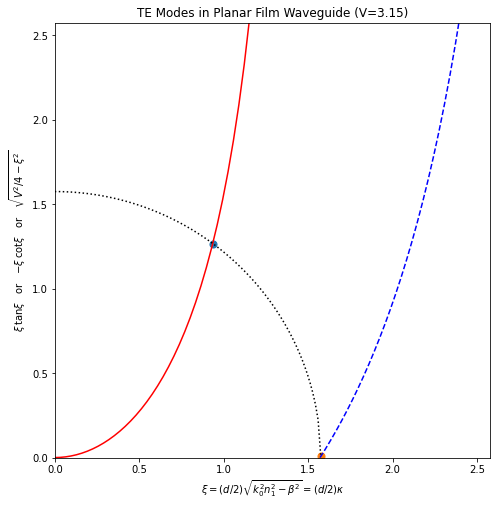

In [3]:
V=3.15
xx = ofiber.TE_crossings(V)
aplt = ofiber.TE_mode_plot(V)
yy = np.sqrt((V / 2)**2 - xx[0::2]**2)
aplt.scatter(xx[0::2],yy,s=50)
yy = np.sqrt((V / 2)**2 - xx[1::2]**2)
aplt.scatter(xx[1::2],yy,s=50)

aplt.show()

### V=4.77

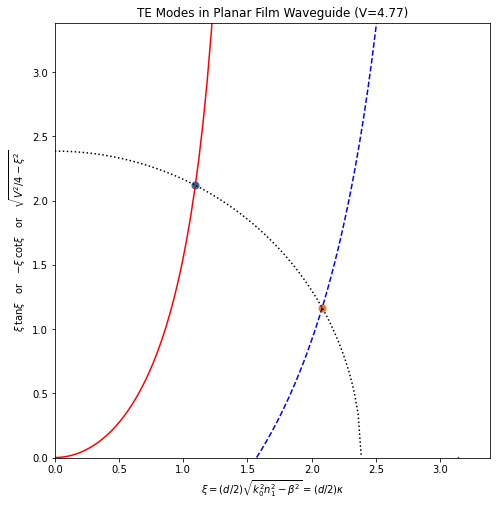

[1.09425217 2.08131807]
b       = [0.78958411 0.23876175]
beta hat= [1.50236925 1.50071683]
theta   = [1.6599766  3.15850983]  degrees


In [4]:
n1=1.503
n2=1.5
lambda0 = 0.5e-6
k=2*np.pi/lambda0
NA = np.sqrt(n1**2-n2**2)
d = 4e-6

V = k * d * NA
xx = ofiber.TE_crossings(V)

b = 1-(2*xx/V)**2
beta = np.sqrt((n1**2-n2**2)*b+n2**2)
theta = np.arccos(beta/n1)*180/np.pi

aplt = ofiber.TE_mode_plot(V)
yy = np.sqrt((V / 2)**2 - xx[0::2]**2)
aplt.scatter(xx[0::2],yy,s=50)
yy = np.sqrt((V / 2)**2 - xx[1::2]**2)
aplt.scatter(xx[1::2],yy,s=50)
aplt.show()

print(xx)
print('b       =',b)
print('beta hat=',beta)
print('theta   =',theta,' degrees')


### V=5.5

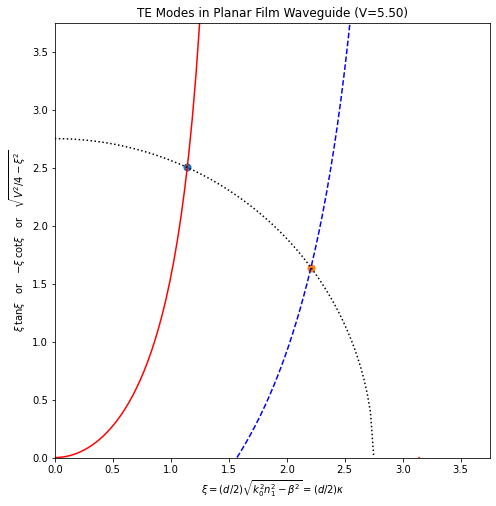

cutoff wavelength = 759 nm


In [5]:
V=5.5
xx = ofiber.TE_crossings(V)
aplt = ofiber.TE_mode_plot(V)
yy = np.sqrt((V / 2)**2 - xx[0::2]**2)
aplt.scatter(xx[0::2],yy,s=50)
yy = np.sqrt((V / 2)**2 - xx[1::2]**2)
aplt.scatter(xx[1::2],yy,s=50)

aplt.show()

print('cutoff wavelength = %.0f nm'%(2*d*NA*1e9))

### V=16

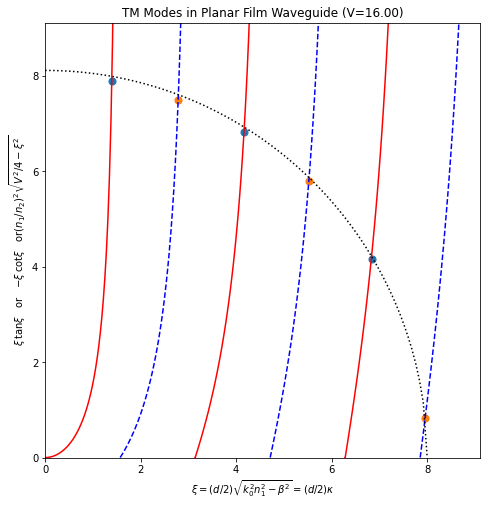

In [6]:
V=16
n1=1.5
n2=1.49
xx = ofiber.TM_crossings(V,n1,n2)

aplt = ofiber.TM_mode_plot(V,n1,n2)
yy = np.sqrt((V / 2)**2 - xx[0::2]**2)
aplt.scatter(xx[0::2],yy,s=50)
yy = np.sqrt((V / 2)**2 - xx[1::2]**2)
aplt.scatter(xx[1::2],yy,s=50)

aplt.show()

## Internal field inside waveguide

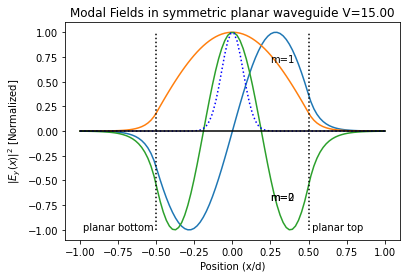

In [7]:
V= 15
d = 1
x = np.linspace(-1,1,100)

m=1
plt.plot(x,ofiber.TE_field(V,d,x,m))
plt.annotate('m=%d'%m,xy=(0.25,0.7))

m=0
plt.plot(x,ofiber.TE_field(V,d,x,m))
plt.annotate('m=%d'%m,xy=(0.25,-0.7))

m=2
plt.plot(x,ofiber.TE_field(V,d,x,m))
plt.annotate('m=%d'%m,xy=(0.25,-0.7))

plt.plot(x,np.exp(-x**2/0.01),':b')
plt.plot([-1,1],[0,0],'k')

plt.plot([-0.5,-0.5],[-1,1],':k')
plt.plot([0.5,0.5],[-1,1],':k')
plt.annotate('planar bottom ',xy=(-0.5,-1),ha='right')
plt.annotate(' planar top',xy=(0.5,-1),ha='left')

plt.xlabel('Position (x/d)')
plt.ylabel('$|E_y(x)|^2$ [Normalized]')
plt.title('Modal Fields in symmetric planar waveguide V=%.2f'%V)
plt.show()

## TE propagation constants for first five modes

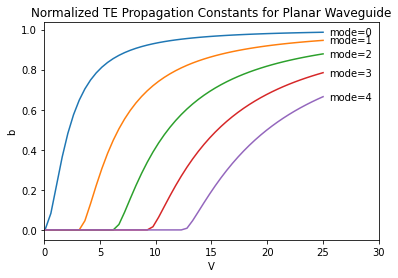

In [8]:
V = np.linspace(0.1,25,50)
for mode in range(5):
    b = ofiber.TE_propagation_constant(V,mode)
    plt.plot(V,b)
    plt.text(25.5,b[-1],"mode=%d"%mode,va='center')
    
plt.xlabel("V")
plt.ylabel('b')
plt.title('Normalized TE Propagation Constants for Planar Waveguide')
plt.xlim(0,30)
plt.show()

## TE & TM propagation constants for first five modes

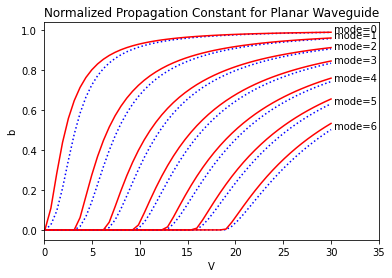

In [9]:
n1=1.5
n2=1.0
V = np.linspace(0.1,30,50)
for mode in range(7):
    b = ofiber.TM_propagation_constant(V,n1,n2,mode)
    plt.annotate(' mode=%d'%mode,xy=(30,b[-1]))
    plt.plot(V,b,':b')
    b = ofiber.TE_propagation_constant(V,mode)
    plt.plot(V,b,'r')
    
plt.xlabel("V")
plt.ylabel('b')
plt.title('Normalized Propagation Constant for Planar Waveguide')
plt.xlim(0,35)
plt.show()